In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [4]:
#1.1
filename = "sample order basket.csv"
df = pd.read_csv(filename)
df.head()

,OrderNum,Product
0,1000,eggs
1,1001,bread
2,1002,eggs
3,1002,bread
4,1002,flour


In [44]:
products = df['Product'].unique()
products.sort()
binary_table = df

for i in products: 
    binary_table[i]=df["Product"].str.contains(i)

df.set_index('OrderNum')
df = df.replace({True:1,False:0})

binary_table = df.groupby(['OrderNum']).sum()

# CODE END
binary_table

,bread,cheese,eggs,flour,jam
OrderNum,,,,,
1000,0,0,1,0,0
1001,1,0,0,0,0
1002,1,0,1,1,0
1003,1,0,1,0,1
1004,0,0,1,0,0
...,...,...,...,...,...
1495,1,0,1,1,0
1496,1,1,1,0,0
1497,0,0,0,0,1


In [46]:
#1.3
combos=binary_table.copy()
combinations= df.groupby('OrderNum').sum()

dictionary=combinations.to_dict()

combo = "combination"
count = "count"

report={combo:[], count :[]}

for i in combinations.index:
    combi=[]
    
    for j in combinations.columns:
        if dictionary[j][i]==1:
            combi.append(j)
            
    report[combo].append(combi)
    
report=pd.DataFrame(report,columns=[combo])
report=report.apply(pd.value_counts)
report.reset_index(inplace=True)

report.columns=[combo,count]

#CODE END 
report

,combination,count
0,[bread],65
1,"[bread, jam]",57
2,"[bread, eggs]",47
3,"[bread, eggs, jam]",46
4,[eggs],31
5,[jam],26
6,"[bread, eggs, flour]",21
7,"[bread, flour, jam]",18
8,"[bread, cheese, eggs]",17
9,"[eggs, jam]",17


In [111]:
import requests as re
import json 
import time 
iss_data=[]
t = 1440
while t > 0:
    mins, secs = divmod(t, 60)
    time.sleep(8)
    r = re.get("http://api.open-notify.org/iss-now.json")
    rcode = r.content.decode('utf8').replace("''","")
    iss_data.append(r.json())
    print (t)
    t -= 8

with open ("iss-data.json","w") as f:
    json.dump(iss_data,f, indent = 2)


1440
1432
1424
1416
1408
1400
1392
1384
1376
1368
1360
1352
1344
1336
1328
1320
1312
1304
1296
1288
1280
1272
1264
1256
1248
1240
1232
1224
1216
1208
1200
1192
1184
1176
1168
1160
1152
1144
1136
1128
1120
1112
1104
1096
1088
1080
1072
1064
1056
1048
1040
1032
1024
1016
1008
1000
992
984
976
968
960
952
944
936
928
920
912
904
896
888
880
872
864
856
848
840
832
824
816
808
800
792
784
776
768
760
752
744
736
728
720
712
704
696
688
680
672
664
656
648
640
632
624
616
608
600
592
584
576
568
560
552
544
536
528
520
512
504
496
488
480
472
464
456
448
440
432
424
416
408
400
392
384
376
368
360
352
344
336
328
320
312
304
296
288
280
272
264
256
248
240
232
224
216
208
200
192
184
176
168
160
152
144
136
128
120
112
104
96
88
80
72
64
56
48
40
32
24
16
8


Text(0.5, 1.0, 'ISS_Position Chart')

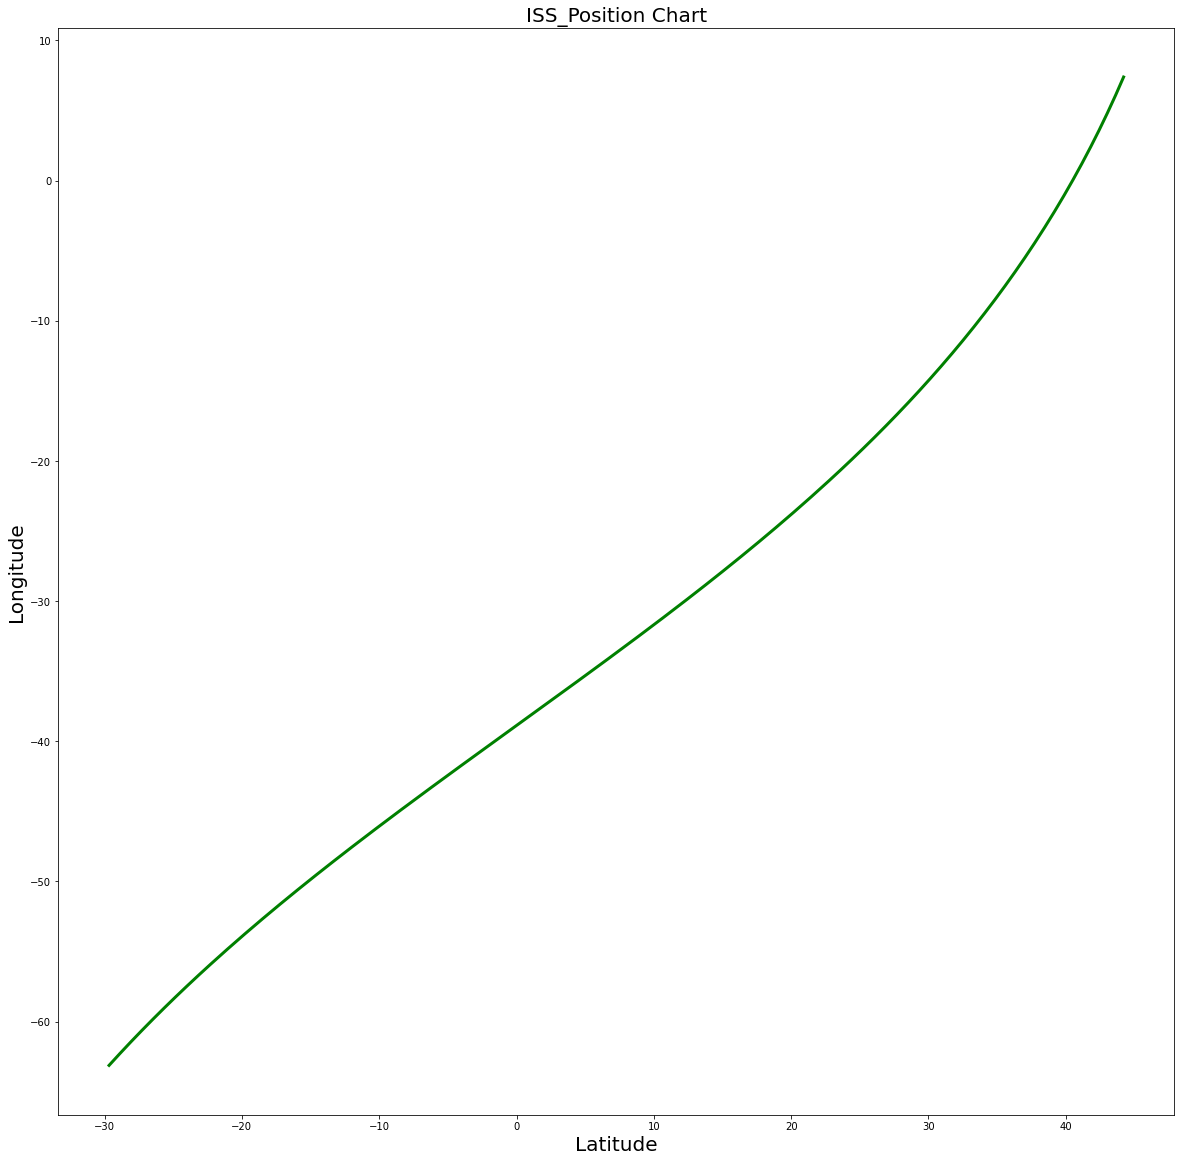

In [114]:
import json

with open("iss-data.json", "r") as iss_file:
    iss_dump= json.loads(iss_file.read())
    
x = []
y = []

for i in iss_dump:
    longitude = float(i['iss_position']['longitude'])
    latitude = float(i["iss_position"]["latitude"])
    x.append(latitude)
    y.append(longitude)
    
fig,axes = plt.subplots(figsize = (20,20))
axes.plot(x,y,"g",lw=3)
axes.set_xlabel("Latitude",fontsize=20)
axes.set_ylabel("Longitude",fontsize=20)
axes.set_title("ISS_Position Chart",fontsize=20)